In [3]:
from keras.datasets import reuters

(train_data, train_label), (test_data, test_label) = reuters.load_data(num_words = 10000)

2113536/2110848 [==============================] - 1s 1us/step


In [4]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

In [5]:
train_label

array([ 3,  4,  3, ..., 25,  3, 25])

In [0]:
import numpy as np


def vectorize(sequences, dimension= 10000):
  result = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    result[i,sequence] = 1
  return result
  
  
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [7]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [8]:
x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_label)
one_hot_test_labels = to_categorical(test_label)

In [10]:
one_hot_train_labels[25]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64,activation = 'relu',input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'sigmoid'))



In [0]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))


Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 215us/step - loss: 3.2554 - acc: 0.4623 - val_loss: 2.7549 - val_acc: 0.4600
Epoch 2/20
7982/7982 [==============================] - 1s 79us/step - loss: 2.3342 - acc: 0.3675 - val_loss: 2.0664 - val_acc: 0.3540
Epoch 3/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.8051 - acc: 0.3514 - val_loss: 1.7841 - val_acc: 0.3540
Epoch 4/20
7982/7982 [==============================] - 1s 73us/step - loss: 1.5427 - acc: 0.3514 - val_loss: 1.5708 - val_acc: 0.3540
Epoch 5/20
7982/7982 [==============================] - 1s 72us/step - loss: 1.2426 - acc: 0.3515 - val_loss: 1.3877 - val_acc: 0.3540
Epoch 6/20
7982/7982 [==============================] - 1s 74us/step - loss: 1.0336 - acc: 0.4318 - val_loss: 1.0525 - val_acc: 0.7810
Epoch 7/20
7982/7982 [==============================] - 1s 73us/step - loss: 0.6112 - acc: 0.8693 - val_loss: 0.9323 - val_acc: 0.8110
Epoch 

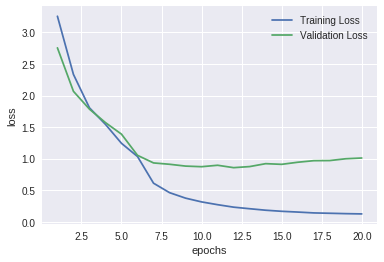

In [22]:
import matplotlib.pyplot as plt
history_dict = history.history
%matplotlib inline
epochs = range(1,len(history_dict['acc'])+1)
plt.plot(epochs,history_dict['loss'],label = 'Training Loss')
plt.plot(epochs,history_dict['val_loss'],label= 'Validation Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

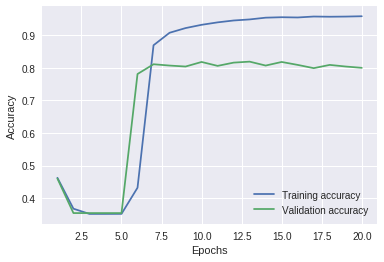

In [25]:
plt.clf()
plt.plot(epochs, history_dict['acc'],label = 'Training accuracy')
plt.plot(epochs, history_dict['val_acc'],label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()